In [40]:
import torch
import numpy as np
import matplotlib.pyplot as plt

external_path=''

In [46]:
def get_similarities_target(positive_digit):
    similarities_cav=np.zeros((9,9))
    abs_x=0
    for negative_digit1 in range(10):
        if negative_digit1==positive_digit:
            continue
        abs_y=0
        for negative_digit2 in range(10):
            if negative_digit2==positive_digit:
                continue
            concept_vector1=torch.load(f'{external_path}\\concept_activation_vectors\\{positive_digit}_{negative_digit1}.pt')
            concept_vector2=torch.load(f'{external_path}\\concept_activation_vectors\\{positive_digit}_{negative_digit2}.pt')
            similarities_cav[abs_x,abs_y]=torch.dot(concept_vector1,concept_vector2).item()
            abs_y+=1
        abs_x+=1
    
    similarities_cbv=np.zeros((9,9))
    abs_x=0
    for negative_digit1 in range(10):
        if negative_digit1==positive_digit:
            continue
        abs_y=0
        for negative_digit2 in range(10):
            if negative_digit2==positive_digit:
                continue
            concept_vector1=np.load(f'{external_path}\\concept_boundary_vectors\\{positive_digit}_{negative_digit1}.npy')
            concept_vector2=np.load(f'{external_path}\\concept_boundary_vectors\\{positive_digit}_{negative_digit2}.npy')
            similarities_cbv[abs_x,abs_y]=np.dot(concept_vector1,concept_vector2).item()
            abs_y+=1
        abs_x+=1
    return similarities_cav,similarities_cbv

In [39]:
def get_similarities_source(negative_digit):
    similarities_cav=np.zeros((9,9))
    abs_x=0
    for positive_digit1 in range(10):
        if positive_digit1==negative_digit:
            continue
        abs_y=0
        for positive_digit2 in range(10):
            if positive_digit2==negative_digit:
                continue
            concept_vector1=torch.load(f'{external_path}\\concept_activation_vectors\\{positive_digit1}_{negative_digit}.pt')
            concept_vector2=torch.load(f'{external_path}\\concept_activation_vectors\\{positive_digit2}_{negative_digit}.pt')
            similarities_cav[abs_x,abs_y]=torch.dot(concept_vector1,concept_vector2).item()
            abs_y+=1
        abs_x+=1
    
    similarities_cbv=np.zeros((9,9))
    abs_x=0
    for positive_digit1 in range(10):
        if positive_digit1==negative_digit:
            continue
        abs_y=0
        for positive_digit2 in range(10):
            if positive_digit2==negative_digit:
                continue
            concept_vector1=np.load(f'{external_path}\\concept_boundary_vectors\\{positive_digit1}_{negative_digit}.npy')
            concept_vector2=np.load(f'{external_path}\\concept_boundary_vectors\\{positive_digit2}_{negative_digit}.npy')
            similarities_cbv[abs_x,abs_y]=np.dot(concept_vector1,concept_vector2).item()
            abs_y+=1
        abs_x+=1
    return similarities_cav,similarities_cbv

In [50]:
for digit in range(10):
    fig,axs=plt.subplots(nrows=1,ncols=2,layout='constrained')
    similarities_cav,similarities_cbv=get_similarities_target(digit)
    axs[0].imshow(similarities_cav,vmin=min(np.min(similarities_cav),np.min(similarities_cbv)),vmax=max(np.max(similarities_cav),np.max(similarities_cbv)))
    im=axs[1].imshow(similarities_cbv,vmin=min(np.min(similarities_cav),np.min(similarities_cbv)),vmax=max(np.max(similarities_cav),np.max(similarities_cbv)))
    axs[0].set_xticks(ticks=range(9),labels=[str(dig) for dig in range(10) if dig!=digit])
    axs[0].set_yticks(ticks=range(9),labels=[str(dig) for dig in range(10) if dig!=digit])
    axs[1].set_xticks(ticks=range(9),labels=[str(dig) for dig in range(10) if dig!=digit])
    axs[1].set_yticks(ticks=range(9),labels=[str(dig) for dig in range(10) if dig!=digit])
    axs[0].set_title(f'Target {digit} CAVs')
    axs[1].set_title(f'Target {digit} CBVs')
    fig.colorbar(im,fraction=0.05)
    plt.savefig(f'{external_path}\\concept_entanglement\\target_concept_vectors\\{digit}.png')
    plt.close()

    fig,axs=plt.subplots(nrows=1,ncols=2,layout='constrained')
    similarities_cav,similarities_cbv=get_similarities_source(digit)
    axs[0].imshow(similarities_cav,vmin=min(np.min(similarities_cav),np.min(similarities_cbv)),vmax=max(np.max(similarities_cav),np.max(similarities_cbv)))
    im=axs[1].imshow(similarities_cbv,vmin=min(np.min(similarities_cav),np.min(similarities_cbv)),vmax=max(np.max(similarities_cav),np.max(similarities_cbv)))
    axs[0].set_xticks(ticks=range(9),labels=[str(dig) for dig in range(10) if dig!=digit])
    axs[0].set_yticks(ticks=range(9),labels=[str(dig) for dig in range(10) if dig!=digit])
    axs[1].set_xticks(ticks=range(9),labels=[str(dig) for dig in range(10) if dig!=digit])
    axs[1].set_yticks(ticks=range(9),labels=[str(dig) for dig in range(10) if dig!=digit])
    axs[0].set_title(f'Source {digit} CAVs')
    axs[1].set_title(f'Source {digit} CBVs')
    fig.colorbar(im,fraction=0.05)
    plt.savefig(f'{external_path}\\concept_entanglement\\source_concept_vectors\\{digit}.png')
    plt.close()

## Topological Analysis of Concept Entanglement

In [59]:
import torch
import kmapper as km
from sklearn.manifold import TSNE
from sklearn.cluster import HDBSCAN
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

external_path='c:\\Users\\thoma\\Documents\\working_docs\\LIoT_aidos_external\\cnn2'

In [65]:
def get_mean_cosine_similarity(concept_vectors,idxs):
    dots=[]
    for idx1 in idxs:
        for idx2 in idxs:
            if idx1>=idx2:
                continue
            dots.append(np.dot(concept_vectors[idx1,:],concept_vectors[idx2,:]))
    return sum(dots)/len(dots)

In [66]:
def construct_network_from_graph(graph,concept_vectors):
    G=nx.Graph()
    node_names=list(graph['nodes'].keys())
    node_sizes=[len(concepts_in_nodes) for concepts_in_nodes in graph['nodes'].values()]
    node_mean_dots=[get_mean_cosine_similarity(concept_vectors,idxs) for idxs in graph['nodes'].values()]
    for node,node_size,node_mean_dot in zip(node_names,node_sizes,node_mean_dots):
        G.add_node(node,size=node_size,dot=node_mean_dot)
    edges=[]
    for source_node,dest_nodes in graph['links'].items():
        source_node_idx=node_names.index(source_node)
        for dest_node in dest_nodes:
            if source_node_idx<=node_names.index(dest_node):
                edges.append([source_node,dest_node])
    for edge in edges:
        G.add_edge(edge[0],edge[1])
    return G

In [67]:
concept_activation_vectors=[]
concept_boundary_vectors=[]
targets=[]
sources=[]
target_sources=[]

for positive_digit in range(10):
    for negative_digit in range(10):
        if positive_digit==negative_digit:
            continue
        concept_activation_vectors.append(torch.load(f'{external_path}\\concept_activation_vectors\\{positive_digit}_{negative_digit}.pt').unsqueeze(0))
        concept_boundary_vectors.append(np.expand_dims(np.load(f'{external_path}\\concept_boundary_vectors\\{positive_digit}_{negative_digit}.npy'),0))
        targets.append(positive_digit)
        sources.append(negative_digit)
        target_sources.append(f'{positive_digit}_{negative_digit}')

concept_activation_vectors=torch.cat(concept_activation_vectors).detach().numpy()
concept_boundary_vectors=np.concatenate(concept_boundary_vectors)

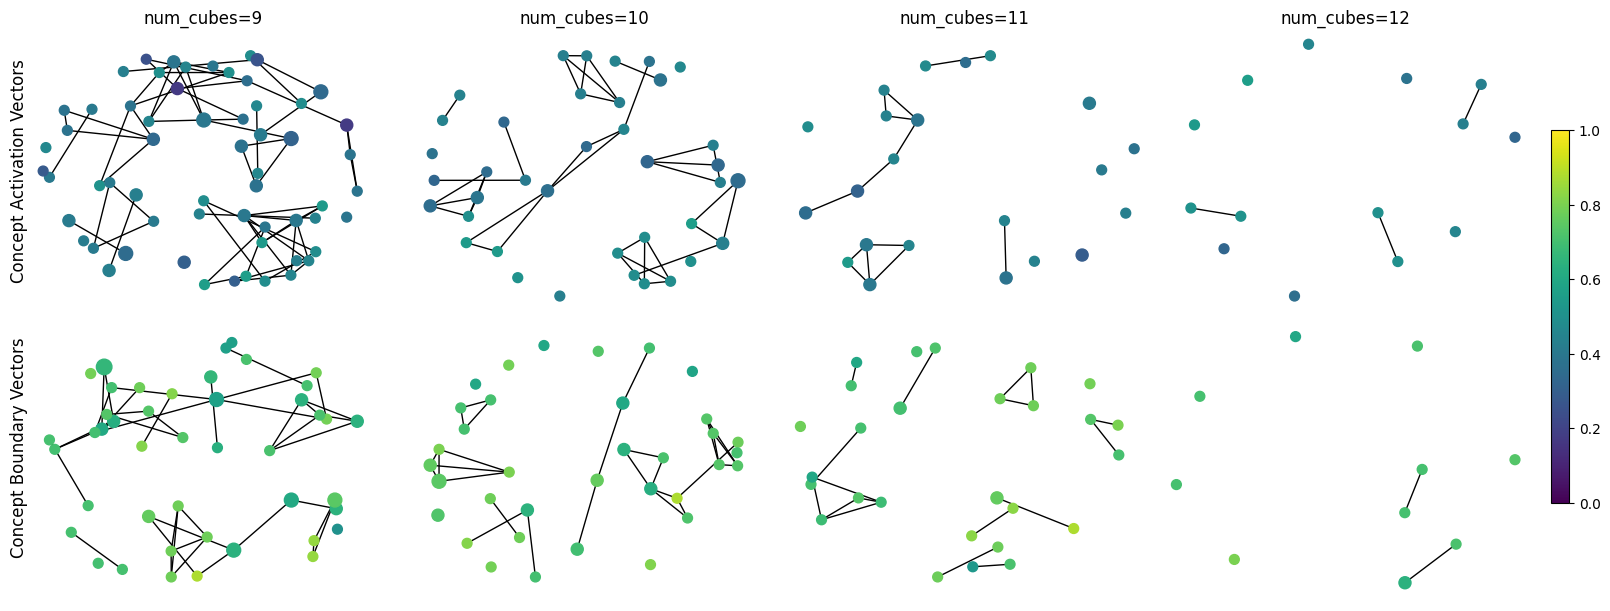

In [105]:
fig,axs=plt.subplots(nrows=2,ncols=4,layout='constrained')
fig.set_figwidth(16)
fig.set_figheight(6)
num_cubes=[9,10,11,12]

random_state=1

concept_activation_vectors_graphs=[]
concept_boundary_vectors_graphs=[]

for k,num_cube in enumerate(num_cubes):
    mapper=km.KeplerMapper()
    projected_data=mapper.fit_transform(concept_activation_vectors,projection=TSNE(n_components=2,random_state=random_state))
    cover=km.Cover(n_cubes=num_cube)
    graph=mapper.map(projected_data,concept_activation_vectors,clusterer=HDBSCAN(min_cluster_size=2),cover=cover)
    G=construct_network_from_graph(graph,concept_activation_vectors)
    concept_activation_vectors_graphs.append(graph)
    layout=nx.spring_layout(G,k=0.75,seed=random_state)
    sizes = nx.get_node_attributes(G,'size')
    colors = nx.get_node_attributes(G,'dot')
    nx.draw(G,pos=layout,node_size=np.array(list(sizes.values()))*25,node_color=np.array(list(colors.values())),ax=axs[0,k],vmin=0,vmax=1)
    axs[0,k].set_title(f'num_cubes={num_cube}')
axs[0,0].annotate('Concept Activation Vectors',xy=(0,0),xytext=(-1.2,-0.9),rotation='vertical',fontsize=12)

for k,num_cube in enumerate(num_cubes):
    mapper=km.KeplerMapper()
    projected_data=mapper.fit_transform(concept_boundary_vectors,projection=TSNE(n_components=2,random_state=random_state))
    cover=km.Cover(n_cubes=num_cube)
    graph=mapper.map(projected_data,concept_boundary_vectors,clusterer=HDBSCAN(min_cluster_size=2),cover=cover)
    G=construct_network_from_graph(graph,concept_boundary_vectors)
    concept_boundary_vectors_graphs.append(graph)
    layout=nx.spring_layout(G,k=0.75,seed=random_state)
    sizes = nx.get_node_attributes(G,'size')
    colors = nx.get_node_attributes(G,'dot')
    nx.draw(G,pos=layout,node_size=np.array(list(sizes.values()))*25,node_color=np.array(list(colors.values())),ax=axs[1,k],vmin=0,vmax=1)
axs[1,0].annotate('Concept Boundary Vectors',xy=(0,0),xytext=(-1.2,-0.8),rotation='vertical',fontsize=12)

cm=plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0,vmax=1))
plt.colorbar(cm,ax=axs[:,3],fraction=0.05)
plt.show()

In [132]:
mapped_nodes=[]
for clusters in concept_activation_vectors_graphs[-2]['nodes'].values():
    node_target_source=[]
    for node in clusters:
        node_target_source.append(target_sources[node])
    mapped_nodes.append(', '.join(node_target_source))
print('\n'.join(list(set(mapped_nodes))))


8_3, 8_5
1_3, 1_5, 1_8
3_6, 5_6, 9_4
1_0, 1_6
4_8, 9_0, 9_8
1_4, 3_4
4_5, 7_5, 9_5
5_2, 5_3
7_0, 7_6
1_7, 1_9
4_5, 9_5
8_0, 8_6
4_0, 9_0, 9_8
4_0, 4_6
2_5, 2_6
4_6, 7_0, 7_6
6_2, 6_7
2_4, 2_9
8_3, 8_5, 8_6


In [129]:
mapped_nodes=[]
for clusters in concept_boundary_vectors_graphs[-2]['nodes'].values():
    node_target_source=[]
    for node in clusters:
        node_target_source.append(target_sources[node])
    mapped_nodes.append(', '.join(node_target_source))
print('\n'.join(list(set(mapped_nodes))))

1_5, 1_6
8_3, 8_5
4_3, 4_5, 9_3
0_1, 0_4
5_4, 8_4
4_1, 7_1
9_0, 9_8
9_1, 9_7
3_6, 5_6
2_3, 7_3
3_1, 7_1
5_4, 5_7, 5_9
3_7, 8_7
3_6, 8_6
7_6, 9_6
9_0, 9_6
5_1, 6_1
4_3, 4_5
0_7, 0_9
5_0, 5_6
2_3, 2_5


In [110]:
def combine_simplices(simplices):
    num_changes=0
    updated_simplices=[]
    checked_idxs=[]
    for k in range(len(simplices)):
        if k in checked_idxs:
            continue
        k_simplex=simplices[k]
        change=False
        for n in range(k+1,len(simplices)):
            if n in checked_idxs:
                continue
            for node in k_simplex:
                if node in simplices[n]:
                    updated_simplices.append(list(set(k_simplex+simplices[n])))
                    checked_idxs.append(n)
                    num_changes+=1
                    change=True
                    break
        if not(change):
            updated_simplices.append(k_simplex)
    return updated_simplices,num_changes

In [131]:
simplices,changes=combine_simplices(concept_activation_vectors_graphs[-2]['simplices'])
while changes>0:
    simplices,changes=combine_simplices(simplices)

mapped_clusters=[]
for simplex in simplices:
    nodes=[]
    for cube in simplex:
        nodes.append(', '.join([target_sources[n] for n in concept_activation_vectors_graphs[-2]['nodes'][cube]]))
    mapped_clusters.append(' - '.join(list(set(nodes))))
print('\n'.join(mapped_clusters))

4_5, 7_5, 9_5 - 4_5, 9_5
4_0, 4_6 - 4_6, 7_0, 7_6 - 7_0, 7_6 - 4_0, 9_0, 9_8 - 4_8, 9_0, 9_8
5_2, 5_3
6_2, 6_7
8_0, 8_6 - 8_3, 8_5, 8_6 - 8_3, 8_5
2_5, 2_6
1_0, 1_6
3_6, 5_6, 9_4
1_3, 1_5, 1_8
1_7, 1_9
1_4, 3_4
2_4, 2_9


In [124]:
simplices,changes=combine_simplices(concept_boundary_vectors_graphs[-2]['simplices'])
while changes>0:
    simplices,changes=combine_simplices(simplices)

mapped_clusters=[]
for simplex in simplices:
    nodes=[]
    for cube in simplex:
        nodes.append(', '.join([target_sources[n] for n in concept_boundary_vectors_graphs[-2]['nodes'][cube]]))
    mapped_clusters.append(' - '.join(list(set(nodes))))
print('\n'.join(mapped_clusters))

5_1, 6_1
5_4, 5_7, 5_9 - 5_4, 8_4
0_1, 0_4
0_7, 0_9
3_7, 8_7
4_1, 7_1 - 3_1, 7_1
9_1, 9_7
3_6, 5_6 - 5_0, 5_6 - 3_6, 8_6
9_0, 9_8 - 9_0, 9_6 - 7_6, 9_6
8_3, 8_5
4_3, 4_5 - 4_3, 4_5, 9_3
2_3, 7_3 - 2_3, 2_5
1_5, 1_6
